In [1]:
import pandas as pd
df = pd.read_csv(r'/content/Disease_symptom_and_patient_profile_dataset.csv')
df


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [2]:
new_df = df.dropna()
print(new_df.to_string())

                                          Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender Blood Pressure Cholesterol Level Outcome Variable
0                                       Influenza   Yes    No     Yes                  Yes   19  Female            Low            Normal         Positive
1                                     Common Cold    No   Yes     Yes                   No   25  Female         Normal            Normal         Negative
2                                          Eczema    No   Yes     Yes                   No   25  Female         Normal            Normal         Negative
3                                          Asthma   Yes   Yes      No                  Yes   25    Male         Normal            Normal         Positive
4                                          Asthma   Yes   Yes      No                  Yes   25    Male         Normal            Normal         Positive
5                                          Eczema   Yes    No      No       

In [3]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')
print(df.to_string())

                                          Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender Blood Pressure Cholesterol Level Outcome Variable
0                                       Influenza   Yes    No     Yes                  Yes   19  Female            Low            Normal         Positive
1                                     Common Cold    No   Yes     Yes                   No   25  Female         Normal            Normal         Negative
2                                          Eczema    No   Yes     Yes                   No   25  Female         Normal            Normal         Negative
3                                          Asthma   Yes   Yes      No                  Yes   25    Male         Normal            Normal         Positive
4                                          Asthma   Yes   Yes      No                  Yes   25    Male         Normal            Normal         Positive
5                                          Eczema   Yes    No      No       

In [4]:
df.loc[8,'Age'] = 72
print(df.to_string())

                                          Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender Blood Pressure Cholesterol Level Outcome Variable
0                                       Influenza   Yes    No     Yes                  Yes   19  Female            Low            Normal         Positive
1                                     Common Cold    No   Yes     Yes                   No   25  Female         Normal            Normal         Negative
2                                          Eczema    No   Yes     Yes                   No   25  Female         Normal            Normal         Negative
3                                          Asthma   Yes   Yes      No                  Yes   25    Male         Normal            Normal         Positive
4                                          Asthma   Yes   Yes      No                  Yes   25    Male         Normal            Normal         Positive
5                                          Eczema   Yes    No      No       

In [5]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4       True
       ...  
344     True
345    False
346     True
347    False
348     True
Length: 349, dtype: bool


In [6]:
columns=['Age']
for column in columns:
   mean=df[column].mean()
   median=df[column].median()
   mode=df[column].mode().iloc[0]
   standarddeviation=df[column].std()
   variance=df[column].var()
   print(f"Mean:{mean}")
   print(f"Median:{median}")
   print(f"Mode:{mode}")
   print(f"StandardDeviation:{standarddeviation}")
   print(f"Variance:{variance}")
   print()


Mean:46.449856733524356
Median:45.0
Mode:35
StandardDeviation:13.119956337189562
Variance:172.13325428976054



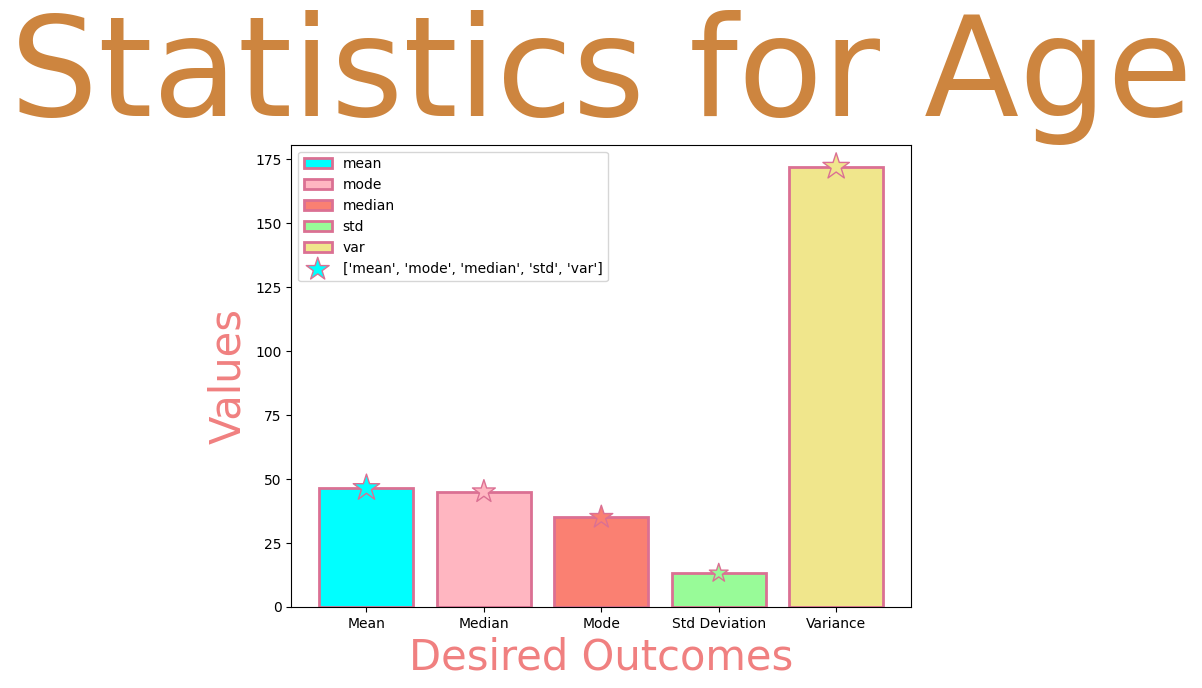

In [7]:
import matplotlib.pyplot as plt
columns = ['Age']
for column in columns:
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode().iloc[0]
    standarddeviation=df[column].std()
    variance=df[column].var()

    color=['cyan', 'lightpink', 'salmon', 'palegreen', 'khaki']
    size=[400,300,300,200,400]
    plt.figure(figsize=(8, 6))
    plt.bar(['Mean', 'Median', 'Mode', 'Std Deviation', 'Variance'],[mean, median, mode, standarddeviation, variance], color=['cyan', 'lightpink', 'salmon', 'palegreen', 'khaki'],width=0.8,edgecolor='palevioletred',linewidth=2,label=['mean','mode','median','std','var'])
    plt.scatter(['Mean', 'Median', 'Mode', 'Std Deviation', 'Variance'],[mean, median, mode, standarddeviation, variance], marker="*",s=size,c=color,edgecolor='palevioletred',label=['mean','mode','median','std','var'])
    plt.title('Statistics for Age',fontsize=100, color="peru")
    plt.xlabel('Desired Outcomes',fontsize=30,color="lightcoral")
    plt.ylabel('Values',fontsize=30,color="lightcoral")
    plt.legend()
    plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Add these imports
x = df.drop('Outcome Variable', axis=1)
y = df['Outcome Variable']
label = LabelEncoder()
x_encoded = x.apply(label.fit_transform)
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)
logistic_reg_model = LogisticRegression(random_state=42)
logistic_reg_model.fit(x_train, y_train)
y_pred_logistic = logistic_reg_model.predict(x_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

print(f'Logistic Regression Accuracy: {accuracy_logistic}')
print(f'Logistic Regression Confusion Matrix:\n{confusion_matrix_logistic}')
print(f'Logistic Regression Classification Report:\n{classification_report_logistic}')


Logistic Regression Accuracy: 0.5428571428571428
Logistic Regression Confusion Matrix:
[[15 15]
 [17 23]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.47      0.50      0.48        30
    Positive       0.61      0.57      0.59        40

    accuracy                           0.54        70
   macro avg       0.54      0.54      0.54        70
weighted avg       0.55      0.54      0.54        70



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

file_path = '/content/Disease_symptom_and_patient_profile_dataset.csv'
df = pd.read_csv(file_path)
print(df.head())
target_column = 'Age'
y = df[target_column]

X = df.drop([target_column], axis=1)

label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction:{y_pred}')
print(f'Accuracy: {accuracy}')

       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  
3         Normal            Normal         Positive  
4         Normal            Normal         Positive  
Prediction:[42 60 65 35 55 55 45 50 60 65 25 38 55 40 30 30 60 60 29 55 35 55 25 50
 35 30 35 28 60 45 55 45 30 40 55 29 60 55 50 55 45 45 39 31 55 55 35 40
 35 65 45 25 35 65 52 70 25 48 35 29 38 30 38 45 25 35 25 45 60 80]
Accuracy: 0.371428

In [10]:
# Q1 What is the total number of rows and columns in the dataset?
No_of_rows,No_of_columns = df.shape
print("No of Rows in Dataset:", No_of_rows)
print("No of columns in Dataset:", No_of_columns)

No of Rows in Dataset: 349
No of columns in Dataset: 10


In [11]:
# Q2 What are the unique diseases in the dataset?
unique_diseases=df['Disease'].unique()
print("Unique diseses are:\n ",unique_diseases)


Unique diseses are:
  ['Influenza' 'Common Cold' 'Eczema' 'Asthma' 'Hyperthyroidism'
 'Allergic Rhinitis' 'Anxiety Disorders' 'Diabetes' 'Gastroenteritis'
 'Pancreatitis' 'Rheumatoid Arthritis' 'Depression' 'Liver Cancer'
 'Stroke' 'Urinary Tract Infection' 'Dengue Fever' 'Hepatitis'
 'Kidney Cancer' 'Migraine' 'Muscular Dystrophy' 'Sinusitis'
 'Ulcerative Colitis' 'Bipolar Disorder' 'Bronchitis' 'Cerebral Palsy'
 'Colorectal Cancer' 'Hypertensive Heart Disease' 'Multiple Sclerosis'
 'Myocardial Infarction (Heart...' 'Urinary Tract Infection (UTI)'
 'Osteoporosis' 'Pneumonia' 'Atherosclerosis'
 'Chronic Obstructive Pulmonary...' 'Epilepsy' 'Hypertension'
 'Obsessive-Compulsive Disorde...' 'Psoriasis' 'Rubella' 'Cirrhosis'
 'Conjunctivitis (Pink Eye)' 'Liver Disease' 'Malaria' 'Spina Bifida'
 'Kidney Disease' 'Osteoarthritis' 'Klinefelter Syndrome' 'Acne'
 'Brain Tumor' 'Cystic Fibrosis' 'Glaucoma' 'Rabies' 'Chickenpox'
 'Coronary Artery Disease' 'Eating Disorders (Anorexia,...' 'Fibrom

In [12]:
# Q3 What is the average age of the patients in the dataset?
Average_age_of_Patients = df['Age'].mean()
print("Average Age of Patients is:", Average_age_of_Patients)


Average Age of Patients is: 46.32378223495702


In [13]:
# Q4 How many male and female patients are there in the dataset?
Gender_Data = df['Gender'].value_counts()
print("Gender Data:\n", Gender_Data)


Gender Data:
 Female    176
Male      173
Name: Gender, dtype: int64


In [14]:
# Q5 What is the mostly coming outcome variable in the dataset?
Outcome_Data = df['Outcome Variable'].value_counts()
Mostly_used_outcome = Outcome_Data.idxmax()
print("Mostly Comming Outcome Variable is:", Mostly_used_outcome)


Mostly Comming Outcome Variable is: Positive


In [15]:
# Q6 What is the percentage of patients with no difficulty breathing?
no_diff_breath_per = (df['Difficulty Breathing'] == 'No').mean() * 100
print("Percentage of Patients with No Difficulty Breathing is:", no_diff_breath_per, "%")


Percentage of Patients with No Difficulty Breathing is: 74.78510028653295 %


In [16]:
# Q7 What is the most common blood pressure level among the patients?
common_blood_pressure=df['Blood Pressure'].mode().values[0]
print("Common bp level is :",common_blood_pressure)


Common bp level is : High


In [17]:
# Q8 How many patients have both fever and cough?
patients_with_cough_fever = df[(df['Fever'] == 'Yes') & (df['Cough'] == 'Yes')]
print("Number of Patients with Fever and Cough are:", len(patients_with_cough_fever))


Number of Patients with Fever and Cough are: 95


In [18]:
# Q9 How many patients have high cholesterol levels and a positive outcome?
patients_with_highchol_pos = df[(df['Cholesterol Level'] == 'High') & (df['Outcome Variable'] == 'Positive')]
print("Number of Patients with High Cholesterol and Positive Outcome is:", len(patients_with_highchol_pos))


Number of Patients with High Cholesterol and Positive Outcome is: 115


In [19]:
# Q10 Calculate the average age difference between consecutive patients in the dataset?
df['Age Difference'] = df['Age'].diff()
Avg_diff = df['Age Difference'].mean()
print("Average Age Difference Between Consecutive Patients is:", Avg_diff)


Average Age Difference Between Consecutive Patients is: 0.20402298850574713


In [20]:
# Q11 Calculate the square of the age for each patient and make seprate coulomn for that?
df['Square_Of_Age'] = df['Age'].apply(lambda x: x ** 2)
print("Age Squared column:\n", df[['Age', 'Square_Of_Age']])



Age Squared column:
      Age  Square_Of_Age
0     19            361
1     25            625
2     25            625
3     25            625
4     25            625
..   ...            ...
344   80           6400
345   85           7225
346   85           7225
347   90           8100
348   90           8100

[349 rows x 2 columns]


In [21]:
# Q12 What is the average cholesterol level for patients with positive outcomes?
import pandas as pd
df['Cholesterol Level']=pd.to_numeric(df['Cholesterol Level'], errors='coerce')
avg_chol_pos_out=df.loc[df['Outcome Variable']=='Positive', 'Cholesterol Level'].mean()
print(avg_chol_pos_out)


nan


In [22]:
# Q13 Create a new column 'Age Group' with labels 'Young', 'Middle-aged', and 'Senior' based on age ranges (0-30, 31-60, 61 and above). Calculate the percentage of positive outcomes for each age group?
bins = [0, 30, 60, 150]
labels = ['Young', 'Middle-aged', 'Senior']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
pos_out_perc_per_age_gr = df.groupby('Age Group')['Outcome Variable'].value_counts(normalize=True).unstack().fillna(0) * 100
print("Percentage of Positive Outcomes for Each Age Group is:\n", pos_out_perc_per_age_gr)


Percentage of Positive Outcomes for Each Age Group is:
 Outcome Variable   Negative   Positive
Age Group                             
Young             46.000000  54.000000
Middle-aged       48.818898  51.181102
Senior            35.555556  64.444444


In [23]:
# Q14 Calculate the cumulative sum of the age for each disease, considering the rows are sorted by age in descending order within each disease?
cumul_age_sum_per_dis = df.groupby('Disease')['Age'].cumsum()
print("Cumulative Sum of Age for Each Disease (Sorted by Age) is:\n", cumul_age_sum_per_dis)


Cumulative Sum of Age for Each Disease (Sorted by Age) is:
 0        19
1        25
2        25
3        25
4        50
       ... 
344     699
345     784
346     869
347     959
348    1049
Name: Age, Length: 349, dtype: int64


In [24]:
# Q15 How many instances are there for each disease?
diseasecount=df['Disease'].value_counts()
print(diseasecount)


Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: Disease, Length: 116, dtype: int64
